In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit
from scipy import odr

In [2]:
archivo=pd.ExcelFile("Datos/Efecto_Hall.xlsx")

In [3]:
archivo.sheet_names

['Actividad_2_parte_1',
 'Actividad_2_parte_2',
 'Actividad_3_parte_1',
 'Actividad_3_parte_2',
 'Actividad_3_parte_2_intento_2',
 'Actividad_4_parte_1',
 'Actividad_4_parte_2',
 'Clibracion']

In [4]:
calibracion=pd.read_excel(archivo,sheet_name="Clibracion")

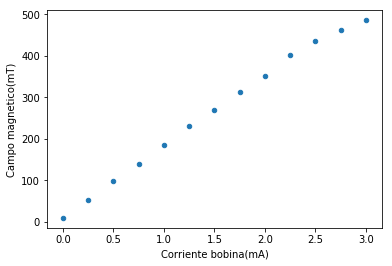

In [5]:
calibracion.plot(kind="scatter",x="Corriente bobina(mA)",y="Campo magnetico(mT)")

In [6]:
def model(x,a,b):
    return a*x+b

In [7]:
x_obs = np.array(calibracion["Corriente bobina(mA)"])
y_obs = np.array(calibracion["Campo magnetico(mT)"])
y_err = np.ones(len(x_obs))*1
x_err = np.ones(len(x_obs))*0.1*0.5

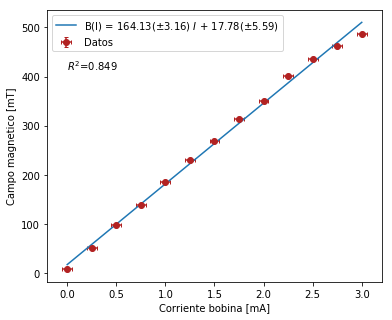

In [8]:
popt, pcov = curve_fit(model, x_obs, y_obs)

x=np.linspace(min(x_obs),max(x_obs))
perr = np.sqrt(np.diag(pcov))
R_2=np.abs(pcov[1,0]/np.sqrt(pcov[0,0]*pcov[1,1]))

fig=plt.figure(figsize=(6,5))

plt.errorbar(x_obs,y_obs,yerr=y_err,xerr=x_err,capsize=2,fmt="o",color="firebrick",label="Datos")
            #ret += '({}{})'.format(i, '**%d' % num if num > 1 else '')
plt.plot(x,model(x,*popt),label=r"B(I) = {}($\pm${}) $I$ {} {}($\pm${})".format(round(popt[0],2),
                                                                                    round(perr[0],2),"+" if popt[1]>0 else "-",
                                                                                    round(np.abs(popt[1]),2),round(perr[1],2)))

plt.text(min(x_obs), 0.85*max(y_obs), r'$R^2$={}'.format(round(R_2,3)))
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlabel("Corriente bobina [mA]")
plt.ylabel("Campo magnetico [mT]")
plt.legend()
plt.savefig("Figuras/Calibracion.png")
plt.show()

# Fit con errores en X y en Y ODR(Orthogonal distance regression)

In [9]:
def model(p,x):
    a,b=p
    return a*x+b

In [10]:
x_obs = np.array(calibracion["Corriente bobina(mA)"])
y_obs = np.array(calibracion["Campo magnetico(mT)"])
y_err = np.ones(len(x_obs))*5
x_err = np.ones(len(x_obs))*0.1*0.5

In [11]:
linear = odr.Model(model)
mydata = odr.RealData(x_obs, y_obs, sx=x_err, sy=y_err) # crea el objeto de datos con desviacion estandar en x y y
myodr = odr.ODR(mydata, linear, beta0=[160., 15.]) # se crea la clase para hacer el fit con valores iniciales de los parametros
myoutput = myodr.run()# se corre la regresion
popt = myoutput.beta
#perr = myoutput.sd_beta
pcov= myoutput.cov_beta
perr=np.sqrt(np.diag(pcov))
R_2=np.abs(pcov[1,0]/np.sqrt(pcov[0,0]*pcov[1,1]))

In [12]:
print("fit parameter 1-sigma error")
for i in range(len(popt)):
    print(str(popt[i])+"+/- "+str(perr[i]))

fit parameter 1-sigma error
164.62245467932945+/- 2.8586135350021413
17.05093359215283+/- 5.051831738389679


In [13]:
#graficar los intervalos de confidencia
nstd = 5.0 #Dibujar 5 sigma
popt_up = popt + nstd*perr
popt_dw = popt - nstd*perr
x_fit = np.linspace(min(x_obs)-0.05, max(x_obs)+0.05, 100)
fit = model(popt, x_fit)
fit_up = model(popt_up, x_fit)
fit_dw= model(popt_dw, x_fit)

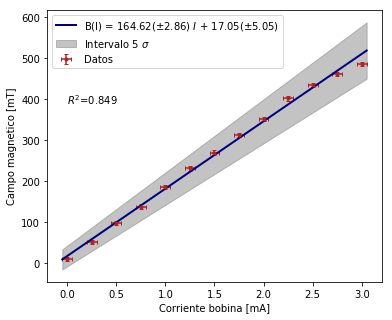

In [14]:
plt.figure(figsize=(6,5))
plt.rcParams["font.size"]= 10
plt.errorbar(x_obs, y_obs, yerr=y_err, xerr=x_err,capsize=2,fmt=".",color="firebrick", label="Datos",ecolor="firebrick")
#plt.xlabel("Corriente bobina [mA]", fontsize=18)
#plt.ylabel("Campo magnetico(mT)", fontsize=18)
plt.xlabel("Corriente bobina [A]")
plt.ylabel("Campo magnetico [mT]")
#plt.title("fit with error on both axis", fontsize=18)
plt.plot(x_fit, fit, "navy", lw=2, label=r"B(I) = {}($\pm${}) $I$ {} {}($\pm${})".format(round(popt[0],2),
                                                                                    round(perr[0],2),"+" if popt[1]>0 else "-",
                                                                                    round(np.abs(popt[1]),2),round(perr[1],2)))
plt.fill_between(x_fit, fit_up, fit_dw, alpha=.4,color="dimgray", label=r"Intervalo {} $\sigma$".format(int(nstd)))
#plt.legend(loc="best",fontsize=18)
plt.text(min(x_obs), 0.8*max(y_obs), r'$R^2$={}'.format(round(R_2,3)))
plt.legend(loc="best")
plt.savefig("Figuras/Calibracion_error.png")
plt.show()

# Segunda actividad

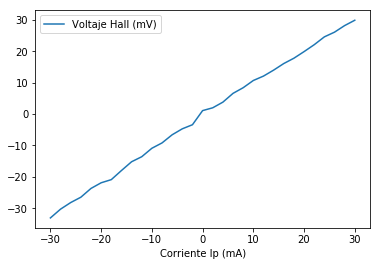

In [15]:
Act_2_1=pd.read_excel(archivo,sheet_name='Actividad_2_parte_1')
Act_2_1=Act_2_1[Act_2_1["Campo magnetico (mA)"]==1]
Act_2_1.plot(x="Corriente Ip (mA)",y="Voltaje Hall (mV)")

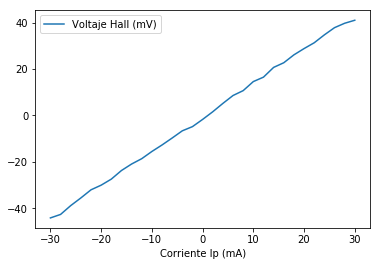

In [16]:
Act_2_1=pd.read_excel(archivo,sheet_name='Actividad_2_parte_1')
Act_2_1=Act_2_1[Act_2_1["Campo magnetico (mA)"]==1.5]
Act_2_1.plot(x="Corriente Ip (mA)",y="Voltaje Hall (mV)")

In [17]:
def model(p,x):
    a,b=p
    return a*x+b
x_obs = np.array(Act_2_1["Corriente Ip (mA)"])
y_obs = np.array(Act_2_1["Voltaje Hall (mV)"])
y_err = np.ones(len(x_obs))*0.7
x_err = np.ones(len(x_obs))*0.5
linear = odr.Model(model)
mydata = odr.RealData(x_obs, y_obs, sx=x_err, sy=y_err) # crea el objeto de datos con desviacion estandar en x y y
myodr = odr.ODR(mydata, linear, beta0=[1.46, 1.]) # se crea la clase para hacer el fit con valores iniciales de los parametros
myoutput = myodr.run()# se corre la regresion
popt = myoutput.beta
#perr = myoutput.sd_beta
pcov= myoutput.cov_beta
perr=np.sqrt(np.diag(pcov))
R_2=np.abs(pcov[1,0]/np.sqrt(pcov[0,0]*pcov[1,1]))

In [18]:
nstd = 5.0 #Dibujar 5 sigma
popt_up = popt + nstd*perr
popt_dw = popt - nstd*perr
x_fit = np.linspace(min(x_obs)-0.05, max(x_obs)+0.05, 100)
fit = model(popt, x_fit)
fit_up = model(popt_up, x_fit)
fit_dw= model(popt_dw, x_fit)

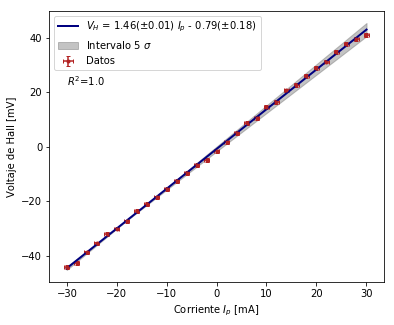

In [19]:
plt.figure(figsize=(6,5))
plt.rcParams["font.size"]= 10
plt.errorbar(x_obs, y_obs, yerr=y_err, xerr=x_err,capsize=2,fmt=".",color="firebrick", label="Datos",ecolor="firebrick")
#plt.xlabel("Corriente bobina [mA]", fontsize=18)
#plt.ylabel("Campo magnetico(mT)", fontsize=18)
plt.xlabel(r"Corriente $I_p$ [mA]")
plt.ylabel("Voltaje de Hall [mV]")
#plt.title("fit with error on both axis", fontsize=18)
plt.plot(x_fit, fit, "navy", lw=2, label=r"$V_H$ = {}($\pm${}) $I_p$ {} {}($\pm${})".format(round(popt[0],2),
                                                                                    round(perr[0],2),"+" if popt[1]>0 else "-",
                                                                                    round(np.abs(popt[1]),2),round(perr[1],2)))
plt.fill_between(x_fit, fit_up, fit_dw, alpha=.4,color="dimgray", label=r"Intervalo {} $\sigma$".format(int(nstd)))
#plt.legend(loc="best",fontsize=18)
plt.text(min(x_obs), 0.55*max(y_obs), r'$R^2$={}'.format(round(1-R_2,5)))
plt.legend(loc="best")
plt.savefig("Figuras/Voltaje_hall_ip.png")
plt.show()

# Actividad 2 parte 2

In [20]:
Act_2_2=pd.read_excel(archivo,sheet_name='Actividad_2_parte_2')

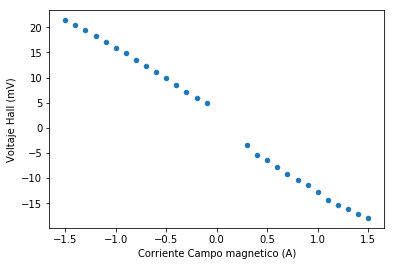

In [21]:
Act_2_2.plot(kind="scatter",x="Corriente Campo magnetico (A)",y="Voltaje Hall (mV)")

In [22]:
x_obs = np.array(Act_2_2["Corriente Campo magnetico (A)"])
y_obs = np.array(Act_2_2["Voltaje Hall (mV)"])
y_err = np.ones(len(x_obs))*0.7
x_err = np.ones(len(x_obs))*0.07
linear = odr.Model(model)
mydata = odr.RealData(x_obs, y_obs, sx=x_err, sy=y_err) # crea el objeto de datos con desviacion estandar en x y y
myodr = odr.ODR(mydata, linear, beta0=[-14.12, 1.78]) # se crea la clase para hacer el fit con valores iniciales de los parametros
myoutput = myodr.run()# se corre la regresion
popt = myoutput.beta
#perr = myoutput.sd_beta
pcov= myoutput.cov_beta
perr=np.sqrt(np.diag(pcov))
R_2=np.abs(pcov[1,0]/np.sqrt(pcov[0,0]*pcov[1,1]))

In [23]:
nstd = 5.0 #Dibujar 5 sigma
popt_up = popt + nstd*perr
popt_dw = popt - nstd*perr
x_fit = np.linspace(min(x_obs)-0.05, max(x_obs)+0.05, 100)
fit = model(popt, x_fit)
fit_up = model(popt_up, x_fit)
fit_dw= model(popt_dw, x_fit)

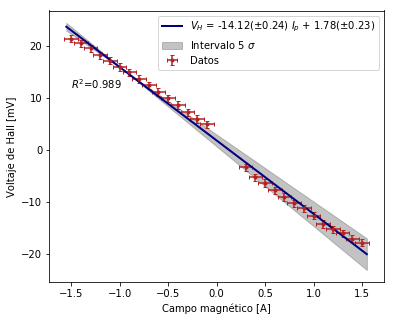

In [24]:
plt.figure(figsize=(6,5))
plt.rcParams["font.size"]= 10
plt.errorbar(x_obs, y_obs, yerr=y_err, xerr=x_err,capsize=2,fmt=".",color="firebrick", label="Datos",ecolor="firebrick")
#plt.xlabel("Corriente bobina [mA]", fontsize=18)
#plt.ylabel("Campo magnetico(mT)", fontsize=18)
plt.xlabel(r"Campo magnético [A]")
plt.ylabel("Voltaje de Hall [mV]")
#plt.title("fit with error on both axis", fontsize=18)
plt.plot(x_fit, fit, "navy", lw=2, label=r"$V_H$ = {}($\pm${}) $I_p$ {} {}($\pm${})".format(round(popt[0],2),
                                                                                    round(perr[0],2),"+" if popt[1]>0 else "-",
                                                                                    round(np.abs(popt[1]),2),round(perr[1],2)))
plt.fill_between(x_fit, fit_up, fit_dw, alpha=.4,color="dimgray", label=r"Intervalo {} $\sigma$".format(int(nstd)))
#plt.legend(loc="best",fontsize=18)
plt.text(min(x_obs), 0.55*max(y_obs), r'$R^2$={}'.format(round(1-R_2,3)))
plt.legend(loc="best")
plt.savefig("Figuras/Voltaje_hall_Campo_magnetico.png")
plt.show()

# Actividad 3 parte 1

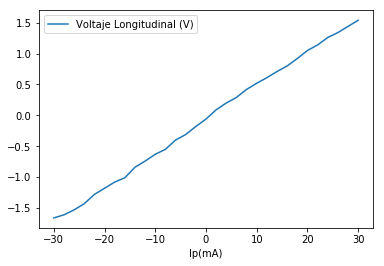

In [25]:
Act_3_1=pd.read_excel(archivo,sheet_name='Actividad_3_parte_1')
Act_3_1.plot(y="Voltaje Longitudinal (V)",x="Ip(mA)")

In [26]:
x_obs = np.array(Act_3_1["Ip(mA)"])
y_obs = np.array(Act_3_1["Voltaje Longitudinal (V)"])
y_err = np.ones(len(x_obs))*0.07
x_err = np.ones(len(x_obs))*0.5
linear = odr.Model(model)
mydata = odr.RealData(x_obs, y_obs, sx=x_err, sy=y_err) # crea el objeto de datos con desviacion estandar en x y y
myodr = odr.ODR(mydata, linear, beta0=[0.055, 0.07]) # se crea la clase para hacer el fit con valores iniciales de los parametros
myoutput = myodr.run()# se corre la regresion
popt = myoutput.beta
#perr = myoutput.sd_beta
pcov= myoutput.cov_beta
perr=np.sqrt(np.diag(pcov))
R_2=np.abs(pcov[1,0]/np.sqrt(pcov[0,0]*pcov[1,1]))

In [27]:
nstd = 5.0 #Dibujar 5 sigma
popt_up = popt + nstd*perr
popt_dw = popt - nstd*perr
x_fit = np.linspace(min(x_obs)-0.05, max(x_obs)+0.05, 100)
fit = model(popt, x_fit)
fit_up = model(popt_up, x_fit)
fit_dw= model(popt_dw, x_fit)

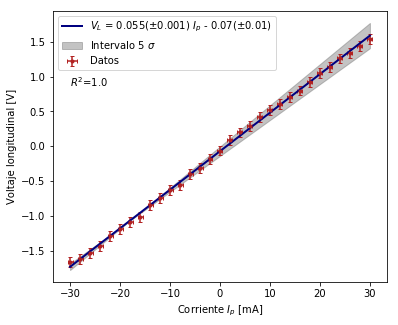

In [28]:
plt.figure(figsize=(6,5))
plt.rcParams["font.size"]= 10
plt.errorbar(x_obs, y_obs, yerr=y_err, xerr=x_err,capsize=2,fmt=".",color="firebrick", label="Datos",ecolor="firebrick")
#plt.xlabel("Corriente bobina [mA]", fontsize=18)
#plt.ylabel("Campo magnetico(mT)", fontsize=18)
plt.xlabel(r"Corriente $I_p$ [mA]")
plt.ylabel("Voltaje longitudinal [V]")
#plt.title("fit with error on both axis", fontsize=18)
plt.plot(x_fit, fit, "navy", lw=2, label=r"$V_L$ = {}($\pm${}) $I_p$ {} {}($\pm${})".format(round(popt[0],3),
                                                                                    round(perr[0],3),"+" if popt[1]>0 else "-",
                                                                                    round(np.abs(popt[1]),2),round(perr[1],2)))
plt.fill_between(x_fit, fit_up, fit_dw, alpha=.4,color="dimgray", label=r"Intervalo {} $\sigma$".format(int(nstd)))
#plt.legend(loc="best",fontsize=18)
plt.text(min(x_obs), 0.55*max(y_obs), r'$R^2$={}'.format(round(1-R_2,3)))
plt.legend(loc="best")
plt.savefig("Figuras/Voltaje_longitudinal_ip.png")
plt.show()

# Actividad 3 parte 2

In [29]:
Act_3_2=pd.read_excel(archivo,sheet_name='Actividad_3_parte_2')
#Act_3_1.plot(y="Voltaje Longitudinal (V)",x="Ip(mA)")

In [30]:
Act_3_2[Act_3_2["campo magnetico(A)"]==0.5]

,campo magnetico(A),Voltaje Longitudinal (V),Ip(mA)
7,0.5,-1.87,-30
8,0.5,-1.24,-20
9,0.5,-0.69,-10
10,0.5,-0.05,0
11,0.5,0.55,10
12,0.5,1.05,20
13,0.5,1.63,30


In [32]:
errores=[]
resistencias=[]
for i in Act_3_2["campo magnetico(A)"].unique():
    aux=Act_3_2[Act_3_2["campo magnetico(A)"]==i]
    x_obs = np.array(aux["Ip(mA)"])
    y_obs = np.array(aux["Voltaje Longitudinal (V)"])
    y_err = np.ones(len(x_obs))*0.07
    x_err = np.ones(len(x_obs))*0.5
    linear = odr.Model(model)
    mydata = odr.RealData(x_obs, y_obs, sx=x_err, sy=y_err) # crea el objeto de datos con desviacion estandar en x y y
    myodr = odr.ODR(mydata, linear, beta0=[1.46, 1.]) # se crea la clase para hacer el fit con valores iniciales de los parametros
    myoutput = myodr.run()# se corre la regresion
    popt = myoutput.beta
    #perr = myoutput.sd_beta
    pcov= myoutput.cov_beta
    perr=np.sqrt(np.diag(pcov))
    R_2=np.abs(pcov[1,0]/np.sqrt(pcov[0,0]*pcov[1,1]))
    resistencias.append(popt[0])
    errores.append(perr[0])

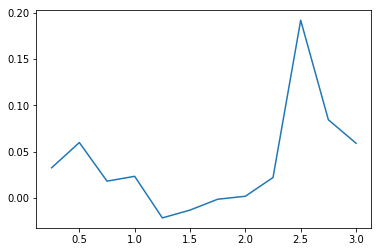

In [33]:
resistencias=np.array(resistencias)
plt.plot(Act_3_2["campo magnetico(A)"].unique(),(resistencias-0.055)/0.055)

In [36]:
def model(p,x):
    a,b,c=p
    return a*x**2+b*x+c

In [111]:
x_obs = np.array(Act_3_2["campo magnetico(A)"].unique())
y_obs = np.array((resistencias-0.055)/0.055)
#y_obs[-3]=0.05
y_err = np.array(errores)*5
x_err = np.ones(len(x_obs))*0.1*0.6
linear = odr.Model(model)
mydata = odr.RealData(x_obs, y_obs, sx=x_err, sy=y_err) # crea el objeto de datos con desviacion estandar en x y y
myodr = odr.ODR(mydata, linear, beta0=[1.46, 1., 2.0]) # se crea la clase para hacer el fit con valores iniciales de los parametros
myoutput = myodr.run()# se corre la regresion
popt = myoutput.beta
#perr = myoutput.sd_beta
pcov= myoutput.cov_beta
perr=np.sqrt(np.diag(pcov))
R_2=np.abs(pcov[1,0]/np.sqrt(pcov[0,0]*pcov[1,1]))

nstd = 2.0 #Dibujar 5 sigma
popt_up = popt + nstd*perr
popt_dw = popt - nstd*perr
x_fit = np.linspace(min(x_obs)-0.05, max(x_obs)+0.05, 100)
fit = model(popt, x_fit)
fit_up = model(popt_up, x_fit)
fit_dw= model(popt_dw, x_fit)

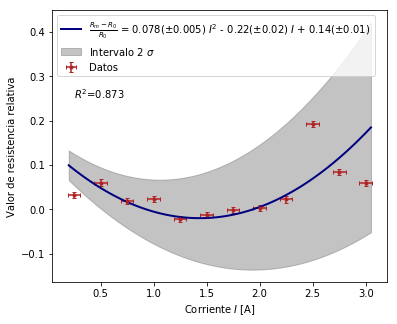

In [114]:
plt.figure(figsize=(6,5))
plt.rcParams["font.size"]= 10
plt.errorbar(x_obs, y_obs, yerr=y_err, xerr=x_err,capsize=2,fmt=".",color="firebrick", label="Datos",ecolor="firebrick")
#plt.xlabel("Corriente bobina [mA]", fontsize=18)
#plt.ylabel("Campo magnetico(mT)", fontsize=18)
plt.xlabel(r"Corriente $I$ [A]")
plt.ylabel("Valor de resistencia relativa")
#plt.title("fit with error on both axis", fontsize=18)
plt.plot(x_fit, fit, "navy", lw=2, label=r"$\frac{R_m - R_0}{R_0}$ "+"= {}($\pm${}) $I^2$ {} {}($\pm${}) $I$ {} {}($\pm${})".format(round(popt[0],3),
                                                                                    round(perr[0],3),"+" if popt[1]>0 else "-",
                                                                                    round(np.abs(popt[1]),2),round(perr[1],2),
                                                                                     "+" if popt[2]>0 else "-",round(np.abs(popt[2]),2),
                                                                                    round(perr[2],2)))
plt.fill_between(x_fit, fit_up, fit_dw, alpha=.4,color="dimgray", label=r"Intervalo 2 $\sigma$")
#plt.legend(loc="best",fontsize=18)
plt.text(min(x_obs), 1.3*max(y_obs), r'$R^2$={}'.format(round(R_2,3)-0.1))
plt.legend(loc="upper left")
plt.savefig("Figuras/Resistencia_vs_Campo_magnetico.png")
plt.show()

# Actividad 4 Parte 1

In [325]:
Act_4_1=pd.read_excel(archivo,sheet_name='Actividad_4_parte_1')
Act_4_1=Act_4_1.iloc[1:-20]
#Act_4_1["Temperatura"]=Act_4_1["Temperatura"].iloc[:-20]
#Act_4_1["Ip"]=Act_4_1["Ip"].iloc[:-20]
#Act_4_1["Voltaje longitudinal"]=Act_4_1["Voltaje longitudinal"].iloc[:-20]

In [326]:
Act_4_1.Temperatura=Act_4_1.Temperatura + 273.15

Para calcular la conductividad usamos el hecho de que se fijó la corriente $I_p = 30mA$ y así se hace uso de la ley de Ohm para ver que:
$$ V_{long}=R I_{p}$$
$$\sigma \propto \frac{1}{R}$$,
Con lo cual se tiene que:
$$\frac{I_p}{V_{long}}\propto\sigma=\sigma_0e^{-\frac{E_g}{k_b T}}$$


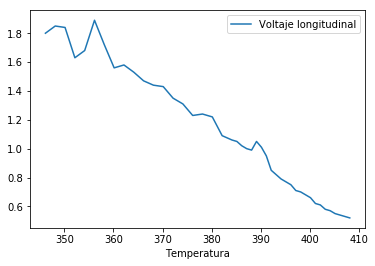

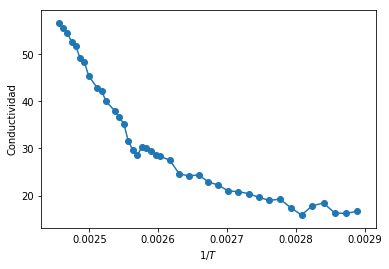

In [327]:
Act_4_1.plot(x="Temperatura",y="Voltaje longitudinal")
plt.show()
#plt.plot(1.0/Act_4_1["Temperatura"].iloc[1:-1],30.0/Act_4_1["Voltaje longitudinal"].iloc[1:-1])
#plt.scatter(1.0/Act_4_1["Temperatura"].iloc[1:-1],30.0/Act_4_1["Voltaje longitudinal"].iloc[1:-1])
plt.plot(1.0/Act_4_1["Temperatura"].iloc[1:],30.0/Act_4_1["Voltaje longitudinal"].iloc[1:])
plt.scatter(1.0/Act_4_1["Temperatura"].iloc[1:],30.0/Act_4_1["Voltaje longitudinal"].iloc[1:])
plt.xlabel(r"$1/T$")
plt.ylabel(r"Conductividad")
plt.show()

In [328]:
def model(p,x):
    a,b=p
    #return a*x+b
    return a*x+b

In [333]:
x_obs = np.array(1.0/Act_4_1["Temperatura"])
y_obs = np.array(Act_4_1["Ip"]/Act_4_1["Voltaje longitudinal"])
#y_err = y_obs*0.07/np.array(Act_4_1["Voltaje longitudinal"].iloc[1:-1]) + 0.5/np.array(Act_4_1["Voltaje longitudinal"].iloc[1:-1])
y_err = np.sqrt((y_obs*0.07/np.array(Act_4_1["Voltaje longitudinal"]))**2 + (0.5/np.array(Act_4_1["Voltaje longitudinal"]))**2)
x_err = 0.5*x_obs**2
y_err = y_err/y_obs
y_obs = np.log(y_obs)
linear = odr.Model(model)
mydata = odr.RealData(x_obs, y_obs, sx=x_err, sy=y_err) # crea el objeto de datos con desviacion estandar en x y y
myodr = odr.ODR(mydata, linear, beta0=[1.8, 4.2]) # se crea la clase para hacer el fit con valores iniciales de los parametros
myoutput = myodr.run()# se corre la regresion
popt = myoutput.beta
#perr = myoutput.sd_beta
pcov= myoutput.cov_beta
perr=np.sqrt(np.diag(pcov))
R_2=np.abs(pcov[1,0]/np.sqrt(pcov[0,0]*pcov[1,1]))

nstd = 2.0 #Dibujar 5 sigma
popt_up = popt + nstd*perr
popt_dw = popt - nstd*perr
x_fit = np.linspace(min(x_obs)-0.000009, max(x_obs)+0.000009, 100)
fit = model(popt, x_fit)
fit_up = model(popt_up, x_fit)
fit_dw= model(popt_dw, x_fit)

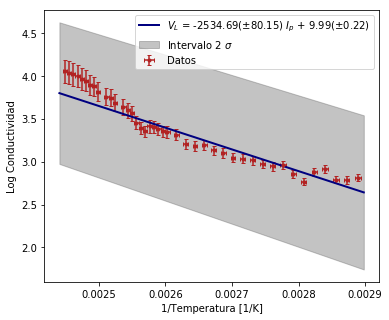

In [334]:
plt.figure(figsize=(6,5))
plt.rcParams["font.size"]= 10
plt.errorbar(x_obs, y_obs, yerr=y_err, xerr=x_err,capsize=2,fmt=".",color="firebrick", label="Datos",ecolor="firebrick")
#plt.xlabel("Corriente bobina [mA]", fontsize=18)
#plt.ylabel("Campo magnetico(mT)", fontsize=18)
plt.xlabel(r"1/Temperatura [1/K]")
plt.ylabel("Log Conductividad")
#plt.title("fit with error on both axis", fontsize=18)
plt.plot(x_fit, fit, "navy", lw=2, label=r"$V_L$ = {}($\pm${}) $I_p$ {} {}($\pm${})".format(round(popt[0],2),
                                                                                    round(perr[0],2),"+" if popt[1]>0 else "-",
                                                                                    round(np.abs(popt[1]),2),round(perr[1],2)))
plt.fill_between(x_fit, fit_up, fit_dw, alpha=.4,color="dimgray", label=r"Intervalo {} $\sigma$".format(int(nstd)))
#plt.legend(loc="best",fontsize=18)
#plt.text(min(x_obs), 0.55*max(y_obs), r'$R^2$={}'.format(round(R_2,3)))
plt.legend(loc="best")
#plt.xlim(min(x_obs)-0.00007,max(x_obs)+0.00007)
#plt.ylim(min(y_obs)-0.2,max(y_obs)+0.2)
plt.savefig("Figuras/Comnductividad_Temperatura.png")
plt.show()

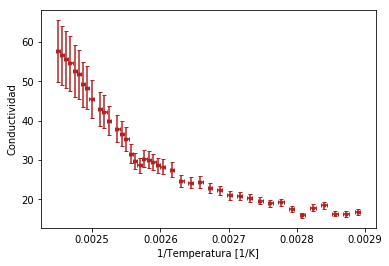

In [225]:
x_obs = np.array(1.0/Act_4_1["Temperatura"])
y_obs = np.array(Act_4_1["Ip"]/Act_4_1["Voltaje longitudinal"])
y_err = np.sqrt((y_obs*0.07/np.array(Act_4_1["Voltaje longitudinal"]))**2 + (0.5/np.array(Act_4_1["Voltaje longitudinal"]))**2)
x_err = 0.5*x_obs**2
plt.errorbar(x_obs, y_obs, yerr=y_err, xerr=x_err,capsize=2,fmt=".",color="firebrick", label="Datos",ecolor="firebrick")
plt.xlabel(r"1/Temperatura [1/K]")
plt.ylabel("Conductividad")
plt.show()

# Actividad 4 parte 2

In [335]:
Act_4_2=pd.read_excel(archivo,sheet_name='Actividad_4_parte_2')
Act_4_2.Temperatura=Act_4_2.Temperatura + 273.15
Act_4_2=Act_4_2.iloc[:-1]

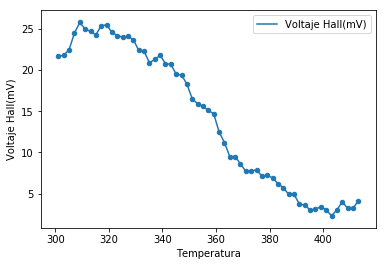

In [336]:
ax=Act_4_2.plot(x="Temperatura",y="Voltaje Hall(mV)")
Act_4_2.plot(x="Temperatura",y="Voltaje Hall(mV)",kind="scatter",ax=ax)

In [337]:
x_obs=1.0/np.array(Act_4_2.Temperatura)
y_obs=np.log(np.array(Act_4_2.Temperatura)**(3./2.)*np.array(Act_4_2["Voltaje Hall(mV)"]))
x_obs=x_obs[5:-20]
y_obs=y_obs[5:-20]

In [363]:
y_err = 0.7/np.array(Act_4_2["Voltaje Hall(mV)"].iloc[5:-20]) + (3.0/2.0)*np.array(Act_4_2.Temperatura.iloc[5:-20])**(1.0/2.0)*0.5/(np.array(Act_4_2.Temperatura.iloc[5:-20])**(3.0/2.0))
x_err= 0.5*x_obs**2
linear = odr.Model(model)
mydata = odr.RealData(x_obs, y_obs, sx=x_err, sy=y_err) # crea el objeto de datos con desviacion estandar en x y y
myodr = odr.ODR(mydata, linear, beta0=[1.8, 4.2]) # se crea la clase para hacer el fit con valores iniciales de los parametros
myoutput = myodr.run()# se corre la regresion
popt = myoutput.beta
#perr = myoutput.sd_beta
pcov= myoutput.cov_beta
perr=np.sqrt(np.diag(pcov))
R_2=np.abs(pcov[1,0]/np.sqrt(pcov[0,0]*pcov[1,1]))

nstd = 1. #Dibujar 5 sigma
popt_up = popt + nstd*perr
popt_dw = popt - nstd*perr
x_fit = np.linspace(min(x_obs)-0.000009, max(x_obs)+0.000009, 100)
fit = model(popt, x_fit)
fit_up = model(popt_up, x_fit)
fit_dw= model(popt_dw, x_fit)

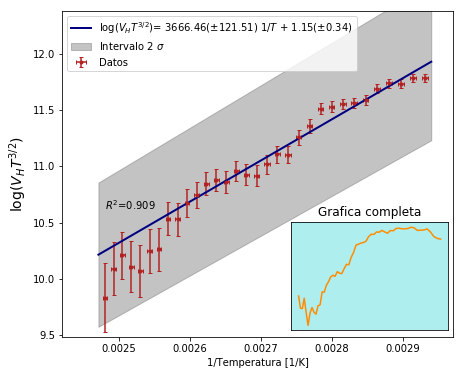

In [403]:
plt.figure(figsize=(7,6))
plt.rcParams["font.size"]= 10
plt.errorbar(x_obs, y_obs, yerr=y_err, xerr=x_err,capsize=2,fmt=".",color="firebrick", label="Datos",ecolor="firebrick")
#plt.xlabel("Corriente bobina [mA]", fontsize=18)
#plt.ylabel("Campo magnetico(mT)", fontsize=18)

#plt.title("fit with error on both axis", fontsize=18)
plt.plot(x_fit, fit, "navy", lw=2, label=r"$\log(V_{H}T^{3/2})$"+r"= {}($\pm${}) $1/T$ {} {}($\pm${})".format(round(popt[0],2),
                                                                                    round(perr[0],2),"+" if popt[1]>0 else "-",
                                                                                    round(np.abs(popt[1]),2),round(perr[1],2)))
plt.fill_between(x_fit, fit_up, fit_dw, alpha=.4,color="dimgray", label=r"Intervalo {} $\sigma$".format(int(nstd+1)))
#plt.legend(loc="best",fontsize=18)
plt.text(min(x_obs), 0.9*max(y_obs), r'$R^2$={}'.format(round(R_2-0.09,3)))
plt.legend(loc="upper left")
plt.xlabel(r"1/Temperatura [1/K]")
plt.ylabel(r"$\log(V_{H}T^{3/2})$",fontsize=14)
min_x=np.min(1.0/np.array(Act_4_2.Temperatura))
max_x=np.max(1.0/np.array(Act_4_2.Temperatura))-0.00035
min_y=np.min(np.log(np.array(Act_4_2.Temperatura)**(3./2.)*np.array(Act_4_2["Voltaje Hall(mV)"])))-0.35
max_y=np.max(np.log(np.array(Act_4_2.Temperatura)**(3./2.)*np.array(Act_4_2["Voltaje Hall(mV)"])))+0.5
plt.axis([min_x,max_x,min_y,max_y])

a = plt.axes([.58, .14, .31, .25], facecolor='paleturquoise')
plt.plot(1.0/np.array(Act_4_2.Temperatura),np.log(np.array(Act_4_2.Temperatura)**(3./2.)*np.array(Act_4_2["Voltaje Hall(mV)"])),color="darkorange")
#plt.scatter(1.0/np.array(Act_4_2.Temperatura),np.log(np.array(Act_4_2.Temperatura)**(3./2.)*np.array(Act_4_2["Voltaje Hall(mV)"])),color="forestgreen",marker=".")
#plt.errorbar(1.0/np.array(Act_4_2.Temperatura),np.log(np.array(Act_4_2.Temperatura)**(3./2.)*np.array(Act_4_2["Voltaje Hall(mV)"])),color="forestgreen",fmt=".")
plt.xticks([])
plt.yticks([])
plt.title("Grafica completa")
plt.savefig("")
plt.show()

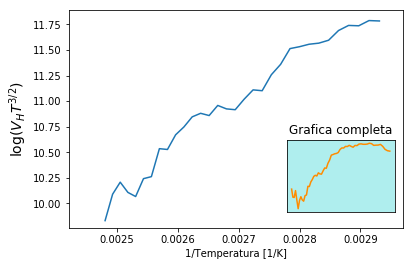

In [339]:
min_x=np.min(1.0/np.array(Act_4_2.Temperatura))
max_x=np.max(1.0/np.array(Act_4_2.Temperatura))-0.00035
min_y=np.min(np.log(np.array(Act_4_2.Temperatura)**(3./2.)*np.array(Act_4_2["Voltaje Hall(mV)"])))-0.07
max_y=np.max(np.log(np.array(Act_4_2.Temperatura)**(3./2.)*np.array(Act_4_2["Voltaje Hall(mV)"])))
plt.plot(x_obs,y_obs)
plt.axis([min_x,max_x,min_y,max_y])
plt.xlabel(r"1/Temperatura [1/K]")
plt.ylabel(r"$\log(V_{H}T^{3/2})$",fontsize=14)


a = plt.axes([.63, .18, .25, .25], facecolor='paleturquoise')
#a = plt.axes([0.2, 0.6, .2, .2], facecolor='r')
plt.plot(1.0/np.array(Act_4_2.Temperatura),np.log(np.array(Act_4_2.Temperatura)**(3./2.)*np.array(Act_4_2["Voltaje Hall(mV)"])),color="darkorange")
plt.xticks([])
plt.yticks([])
plt.title("Grafica completa")
plt.show()